In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
steps_df = pd.read_csv('./../../mifitdata/mi-fit-daily-step-count.csv')

In [25]:
steps_df.dtypes

Date           object
Total Steps     int64
dtype: object

In [37]:
steps_df['Total Steps'].count()

719

In [31]:

steps_df['Date'] = pd.to_datetime(steps_df['Date'], format='%Y-%m-%d')


In [32]:
steps_df.dtypes

Date           datetime64[ns]
Total Steps             int64
dtype: object

<AxesSubplot:xlabel='Date'>

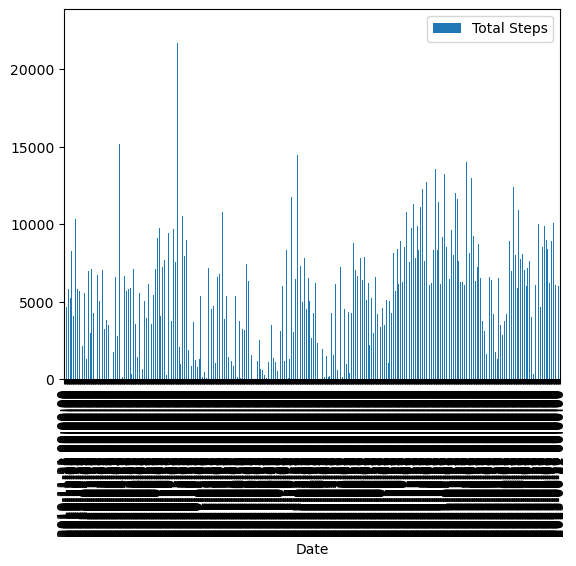

In [35]:
steps_df.plot(y='Total Steps',x='Date',kind='bar')

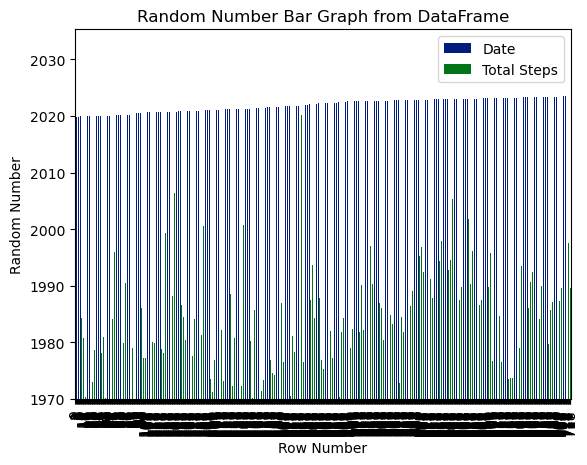

In [36]:
plt.style.use("seaborn-dark-palette")

# customise our plots with the set method
ax = steps_df.plot(kind='bar')
ax.set(title='Random Number Bar Graph from DataFrame',
      xlabel='Row Number',
      ylabel='Random Number')

# Make the legend visible
ax.legend().set_visible(True)

In [40]:
steps_df['Date']

AttributeError: 'Series' object has no attribute 'month'

In [41]:
steps_df.describe()

,Total Steps
count,719.000000
mean,5314.851182
std,3550.190181
min,5.000000
25%,2523.000000
50%,5317.000000
75%,7336.500000
max,22704.000000


In [42]:
steps_df['year'] = steps_df['Date'].dt.year

In [44]:
steps_df.head()

,Date,Total Steps,year
0,2019-11-21,6735,2019
1,2019-11-22,6080,2019
2,2019-11-23,3143,2019
3,2019-11-25,4675,2019
4,2019-11-26,7858,2019


In [51]:
year_total = steps_df.groupby(['year']).sum('Total Steps')
year_total

,Total Steps
year,
2019,150379
2020,857503
2021,456255
2022,1273001
2023,1084240


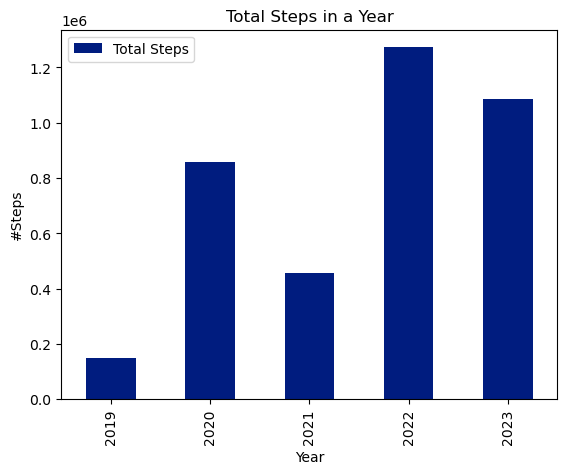

In [52]:

# customise our plots with the set method
ax = year_total.plot(kind='bar')
ax.set(title='Total Steps in a Year',
      xlabel='Year',
      ylabel='#Steps')

# Make the legend visible
ax.legend().set_visible(True)

In [83]:
steps_df['month'] = steps_df['Date'].dt.month
steps_df['year-month'] = steps_df['year'].astype('str') + "-" + steps_df['month'].astype('str')

In [84]:
steps_df.head()

,Date,Total Steps,year,month,year-month
0,2019-11-21,6735,2019,11,2019-11
1,2019-11-22,6080,2019,11,2019-11
2,2019-11-23,3143,2019,11,2019-11
3,2019-11-25,4675,2019,11,2019-11
4,2019-11-26,7858,2019,11,2019-11


In [91]:
year_month_total = steps_df.groupby(['year-month']).sum('Total Steps')
year_month_total=year_month_total.drop('year',axis=1).drop('month',axis=1)

year_month_total = year_month_total.reset_index()
year_month_total.head()

,year-month,Total Steps
0,2019-11,47142
1,2019-12,103237
2,2020-1,108662
3,2020-10,130224
4,2020-11,138470


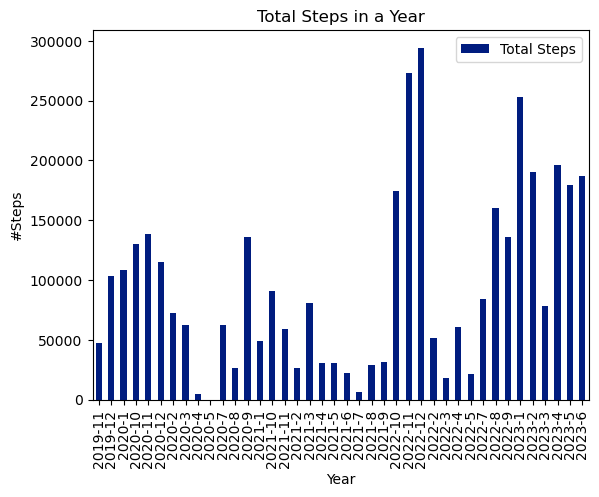

In [87]:
# customise our plots with the set method
ax = year_month_total.plot(kind='bar')
ax.set(title='Total Steps in a Year',
      xlabel='Year',
      ylabel='#Steps')

# Make the legend visible
ax.legend().set_visible(True)

In [82]:
year_month_total.dtypes

Total Steps    int64
dtype: object